In [1]:
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, 
                              ExtraTreesClassifier, AdaBoostClassifier)
from IPython.display import Image

### import data

In [2]:
data = pd.read_csv('../../Data/WeatherOutagesAllJerry.csv')

In [3]:
# clean up data
data = data.dropna(how = 'all')
data = data.fillna(0)
data = data.round(4)

In [4]:
# # of outages apart from equipment outage
natural = data['natural'] = data.Trees + data.Animals + data.Lightning
pd.set_option('display.max_columns', 500)
data.head(5)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,Max_humidity_percent,Avg_humidity_percent,Min_humidity_percent,Max_visibility_mi,Avg_visibility_mi,Min_visibility_mi,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado,natural
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.7833,66.0,58.0,50.0,100.0,89.0,58.0,10.0,6.0,0.0,8.0,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.7167,75.0,62.0,52.0,100.0,69.0,33.0,10.0,10.0,7.0,8.0,4.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9/13/00,1.0,1.0,0.0,0.0,0.0,12.6667,77.0,64.0,54.0,97.0,74.0,52.0,10.0,10.0,10.0,16.0,7.0,25.0,0.00,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/00,0.0,0.0,0.0,0.0,0.0,12.6167,84.0,71.0,60.0,87.0,66.0,39.0,10.0,10.0,10.0,17.0,12.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9/15/00,1.0,1.0,0.0,0.0,0.0,12.5500,73.0,66.0,59.0,97.0,79.0,53.0,10.0,10.0,10.0,12.0,5.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data['Total_outages'].max()

49.0

In [6]:
data['natural'].max()

47.0

In [7]:
data['Equipment'].max()

9.0

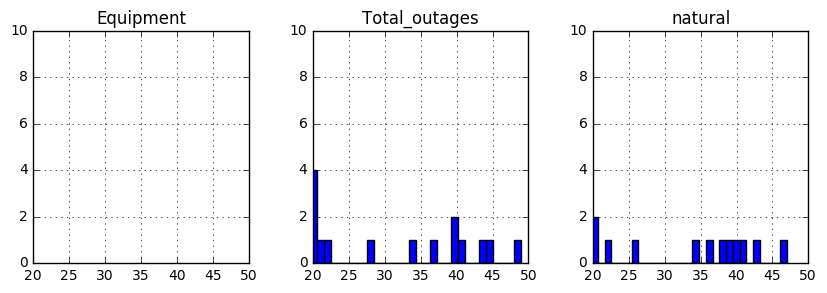

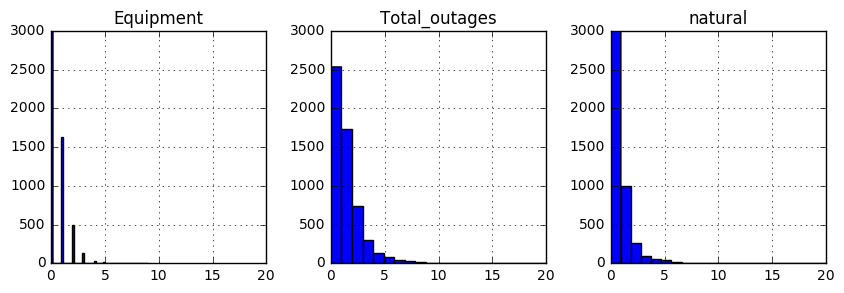

In [8]:
# look at the distribution of power outages

for array in data[['Total_outages','natural','Equipment']].hist(figsize=(10,3),layout=(1,3),bins=50):
    for subplot in array:
        subplot.set_xlim((20,50))
        subplot.set_ylim((0,10))
        
for array in data[['Total_outages','natural','Equipment']].hist(figsize=(10,3),layout=(1,3),bins=50):
    for subplot in array:
        subplot.set_xlim((0,20))
        subplot.set_ylim((0,3000))
        
#0-2, 3-8, >9

In [9]:
#data[['Max_temp_F','Avg_Temp_F','Min_temp_F']].plot()
#data[['Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent']].plot()

In [10]:
#data[['Max_visibility_mi']].plot()
#data[['Avg_visibility_mi']].plot()

In [11]:
# convert to classification problem
def f(row):
    """function that categories days with more than 8 outages as extreme, 
                                3-8 outages as bad, and 0-2 as normal"""
    if row['Total_outages'] > 8:
        val = 'extreme'
    elif row['Total_outages'] > 2:
        val = 'bad'
    else:
        val = 'normal'
    return val

data['category'] = data.apply(f, axis=1)

In [12]:
data.head(2)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,Max_humidity_percent,Avg_humidity_percent,Min_humidity_percent,Max_visibility_mi,Avg_visibility_mi,Min_visibility_mi,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado,natural,category
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.7833,66.0,58.0,50.0,100.0,89.0,58.0,10.0,6.0,0.0,8.0,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.7167,75.0,62.0,52.0,100.0,69.0,33.0,10.0,10.0,7.0,8.0,4.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,normal


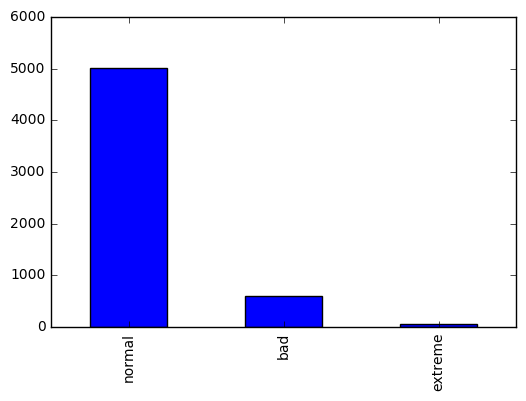

In [13]:
data.category.value_counts().plot(kind='bar')

In [14]:
train,test=train_test_split(data,test_size=0.1,random_state=567)

In [15]:
x_train = train[['Day_length_hr','Avg_Temp_F','Avg_humidity_percent','Avg_windspeed_mph',
             'Max_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_thunderstorm']]
y_train = pd.factorize(train.category)[0]

x_test = test[['Day_length_hr','Avg_Temp_F','Avg_humidity_percent','Avg_windspeed_mph',
             'Max_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_thunderstorm']]
y_test = pd.factorize(test.category)[0]

In [16]:
x_train.head(2)

,Day_length_hr,Avg_Temp_F,Avg_humidity_percent,Avg_windspeed_mph,Max_windspeed_mph,Max_windgust_mph,Precipitation_in,Event_thunderstorm
3851,12.6667,46.0,93.0,9.0,20.0,31.0,0.12,0.0
2964,10.4167,49.0,70.0,6.0,16.0,12.0,0.11,0.0


In [17]:
# data normalization
x_train_nor = pd.DataFrame(preprocessing.normalize(x_train[['Day_length_hr','Avg_Temp_F',
                            'Avg_humidity_percent','Avg_windspeed_mph','Max_windspeed_mph','Max_windgust_mph',
                            'Precipitation_in']])).join(train.Event_thunderstorm)
x_train_nor = x_train_nor.fillna(0)
x_test_nor = pd.DataFrame(preprocessing.normalize(x_test.iloc[:,0:7])).join(test.Event_thunderstorm)
x_test_nor = x_test_nor.fillna(0)

In [18]:
# data standardization
x_train_std = pd.DataFrame(preprocessing.scale(x_train.iloc[:,0:7])).join(train.Event_thunderstorm)
x_train_std = x_train_std.fillna(0)
x_test_std = pd.DataFrame(preprocessing.scale(x_test.iloc[:,0:7])).join(test.Event_thunderstorm)
x_test_std = x_test_std.fillna(0)

In [19]:
x_train_std.head(2)

,0,1,2,3,4,5,6,Event_thunderstorm
0,0.197493,-0.636699,1.558271,0.519736,0.803299,1.309560,0.040439,0.0
1,-0.672493,-0.348591,-0.318426,-0.417665,0.097365,-0.760053,0.001387,0.0


In [20]:
x_train_nor.head(2)

,0,1,2,3,4,5,6,Event_thunderstorm
0,0.113900,0.413635,0.836263,0.080929,0.179841,0.278754,0.001079,0.0
1,0.117603,0.553204,0.790291,0.067739,0.180638,0.135479,0.001242,0.0


In [21]:
x_train_nor.size

40776

In [22]:
y_test.size

567

### Decision Tree 

In [74]:
# using balanced class weight will give higher error, but can predict extreme cases better
dt = DecisionTreeClassifier(min_samples_leaf=10,max_depth=3,class_weight='balanced')

clf_nor = dt.fit(x_train_nor,y_train)

y_train_pred_nor = dt.predict(x_train_nor)
y_test_pred_nor = dt.predict(x_test_nor)

print("Train error for normalized data",mean_squared_error(y_train,y_train_pred_nor))
print("Test error for normalized data",mean_squared_error(y_test,y_test_pred_nor))
print("training score for normalized data",dt.score(x_train_nor,y_train))

tree_dot_nor = export_graphviz(clf_nor,out_file = 'tree_all_nor.dot')

Train error for normalized data 0.585050029429
Test error for normalized data 0.679012345679
training score for normalized data 0.670394349617


In [75]:
clf_std = dt.fit(x_train_std,y_train)

y_train_pred_std = dt.predict(x_train_std)
y_test_pred_std = dt.predict(x_test_std)

print("Train error for standardized data",mean_squared_error(y_train,y_train_pred_std))
print("Test error for standardized data",mean_squared_error(y_test,y_test_pred_std))
print("training score for standardized data",dt.score(x_train_std,y_train))

tree_dot_std = export_graphviz(clf_std,out_file = 'tree_all_std.dot')

Train error for standardized data 1.23248969982
Test error for standardized data 1.19047619048
training score for standardized data 0.490876986463


In [76]:
# probability of each event
dt.predict_proba(x_train_std)[0:10]

array([[ 0.34236268,  0.28266867,  0.37496865],
       [ 0.34236268,  0.28266867,  0.37496865],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.0779328 ,  0.26023784,  0.66182936],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.73591258,  0.26408742,  0.        ],
       [ 0.32731792,  0.6145484 ,  0.05813368]])

In [77]:
# View a list of the features and their importance scores
list(zip(x_train_std, dt.feature_importances_))

[(0, 0.14059737317549434),
 (1, 0.057097116823709444),
 (2, 0.0063464095737213455),
 (3, 0.028463571020497264),
 (4, 0.60751439388415018),
 (5, 0.0),
 (6, 0.15998113552242735),
 ('Event_thunderstorm', 0.0)]

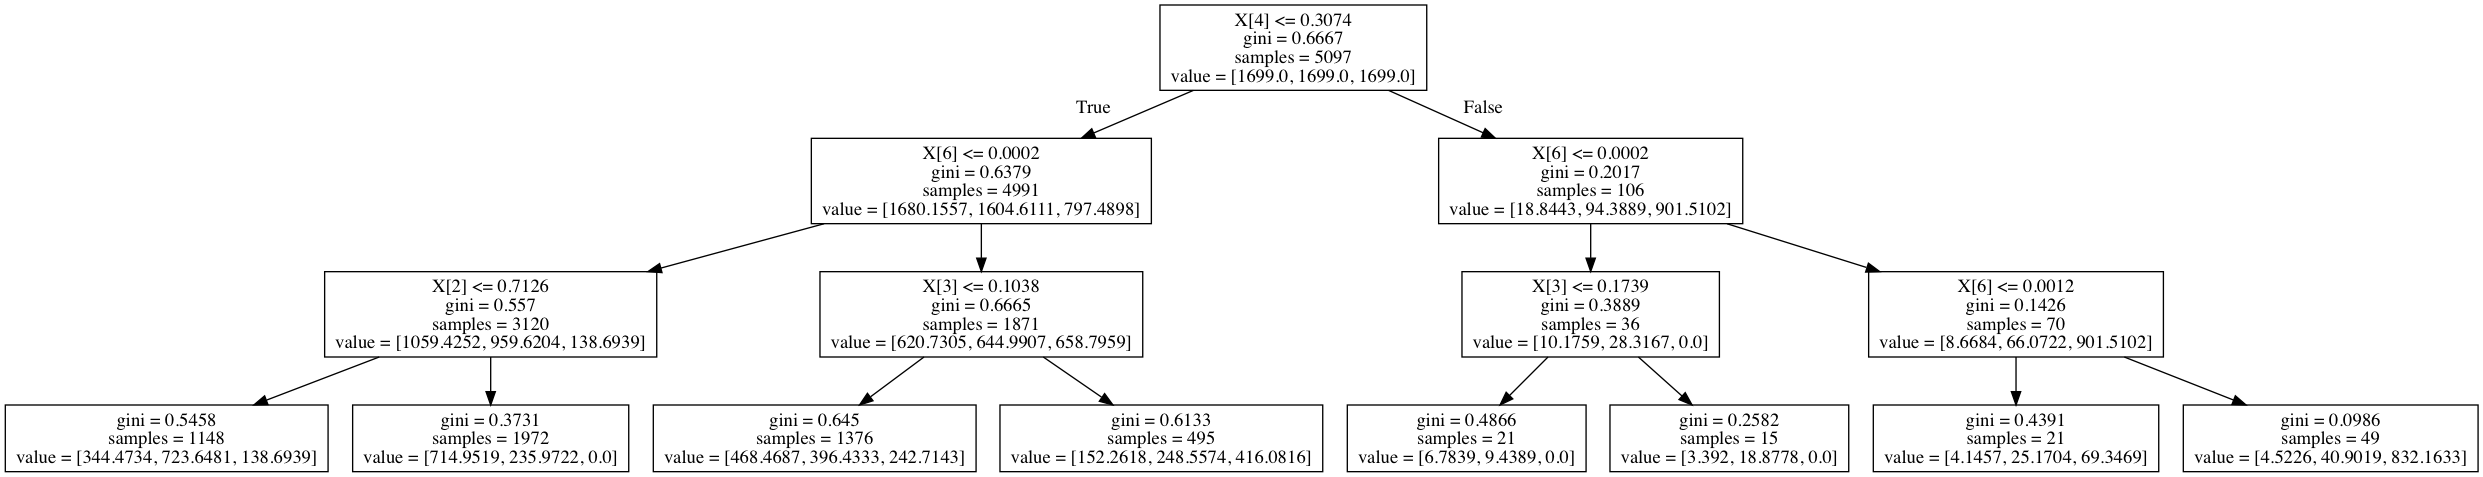

In [78]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all_nor.dot')
Image(graph.create_png())

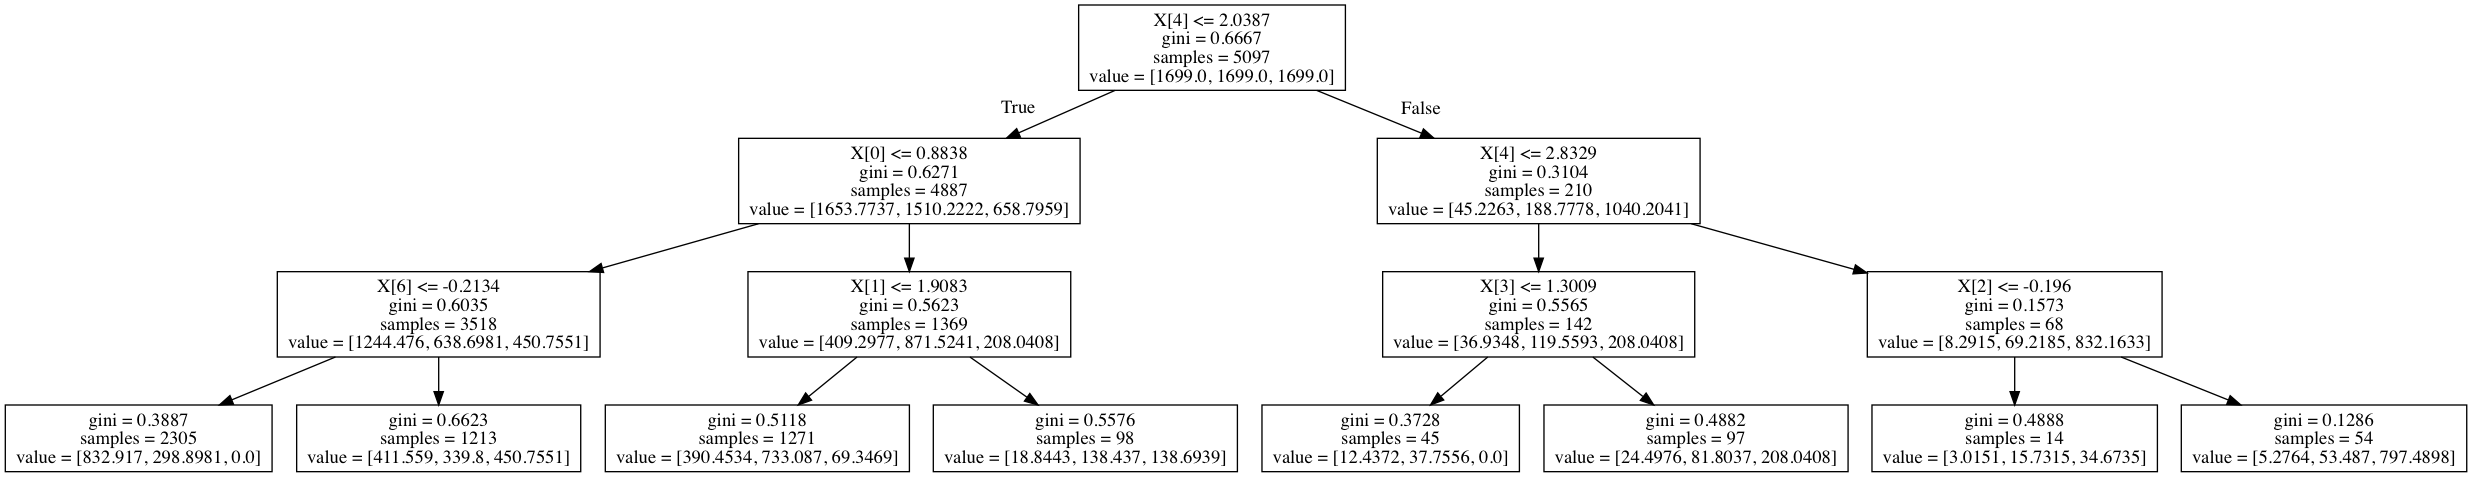

In [79]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all_std.dot')
Image(graph.create_png())

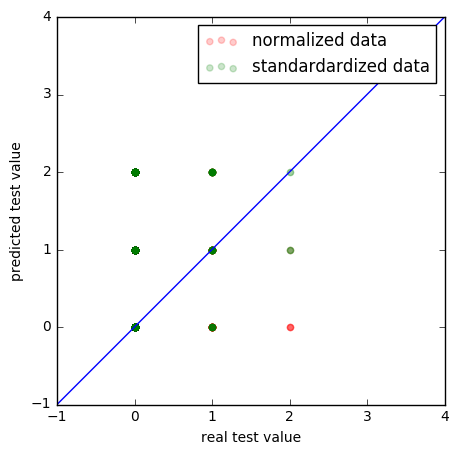

In [80]:
# plot the results
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_test_pred_nor,alpha=0.2,color='red',label='normalized data')
plt.scatter(y_test,y_test_pred_std,alpha=0.2,color='green',label='standardardized data')
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(-5,30),np.arange(-5,30))
plt.xlim([-1,4])
plt.ylim([-1,4])
plt.legend()

### Advanced Tree Methods

In [31]:
# Visualization Parameters
n_classes = 3
n_estimators = 50
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

dt = DecisionTreeClassifier(max_depth=3)
rf = RandomForestClassifier(n_estimators=n_estimators)
et = ExtraTreesClassifier(n_estimators=n_estimators)
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)
bg = BaggingClassifier()

Train error for standardized data using RandomForest is 0.000784775358054
Test error for standardized data using RandomForest is 0.130511463845
Train error for standardized data using ExtraTrees is 0.0
Test error for standardized data using ExtraTrees is 0.141093474427
Train error for standardized data using AdaBoost is 0.123013537375
Test error for standardized data using AdaBoost is 0.162257495591
Train error for standardized data using Bagging is 0.0170688640377
Test error for standardized data using Bagging is 0.130511463845


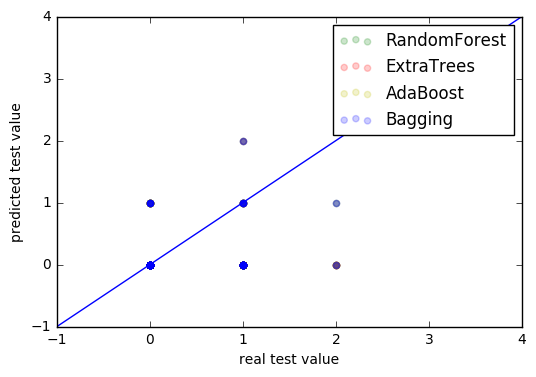

In [33]:
for method, color_, label_ in [(rf,'g','RandomForest'), (et,'r','ExtraTrees'),(ab,'y','AdaBoost'),(bg,'b','Bagging')]:
    clf_std = method.fit(x_train_std,y_train)

    y_train_pred_std = method.predict(x_train_std)
    y_test_pred_std = method.predict(x_test_std)

    print("Train error for standardized data using %s is" % (label_),mean_squared_error(y_train,y_train_pred_std))
    print("Test error for standardized data using %s is" % (label_),mean_squared_error(y_test,y_test_pred_std))
    
    plt.scatter(y_test,y_test_pred_std,alpha=0.2,color=color_,label=label_)
    
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(-5,30),np.arange(-5,30))
plt.xlim([-1,4])
plt.ylim([-1,4])
plt.legend()

In [ ]:
models = 

plot_idx = 1

for model in models:
    # Train
    clf = clone(model)
    clf = model.fit(X, y)

    scores = clf.score(X, y)
    # Create a title for each column and the console by using str() and
    # slicing away useless parts of the string
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    model_details = model_title
    if hasattr(model, "estimators_"):
        model_details += " with {} estimators".format(len(model.estimators_))
    print( model_details + " with features", pair, "has a score of", scores )

    plt.subplot(3, 4, plot_idx)
    if plot_idx <= len(models):
        # Add a title at the top of each column
        plt.title(model_title)

    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Plot either a single DecisionTreeClassifier or alpha blend the
    # decision surfaces of the ensemble of classifiers
    if isinstance(model, DecisionTreeClassifier):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
        # Choose alpha blend level with respect to the number of estimators
        # that are in use (noting that AdaBoost can use fewer estimators
        # than its maximum if it achieves a good enough fit early on)
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    # Build a coarser grid to plot a set of ensemble classifications
    # to show how these are different to what we see in the decision
    # surfaces. These points are regularly space and do not have a black outline
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

    # Plot the training points, these are clustered together and have a
    # black outline
    for i, c in zip(xrange(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=cmap)

    plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers")
plt.axis("tight")

plt.show()